In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

2026-01-15 20:56:33.096464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768510593.121148    1037 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768510593.128957    1037 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768510593.147936    1037 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768510593.147965    1037 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768510593.147968    1037 computation_placer.cc:177] computation placer alr

In [2]:
# generators
train_d = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogsvscats/train",
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_d = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogsvscats/test",
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


I0000 00:00:1768510603.770325    1037 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768510603.774223    1037 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 5000 files belonging to 2 classes.


In [3]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label
train_d = train_d.map(process)
test_d = test_d.map(process)

In [4]:
model= Sequential()
model.add(Conv2D (32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D (128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense (128, activation='relu'))
model.add(Dense (64, activation='relu'))
model.add(Dense (1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_d, epochs=10, validation_data=test_d)

Epoch 1/10


I0000 00:00:1768510632.312941    1106 service.cc:152] XLA service 0x7ce97400d500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768510632.312976    1106 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768510632.312980    1106 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768510632.878749    1106 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-15 20:57:16.143484: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-15 20:57:16.437227: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  3/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.4115 - loss: 1.0009

I0000 00:00:1768510639.543157    1106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.5662 - loss: 0.6853 - val_accuracy: 0.7100 - val_loss: 0.5706
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7229 - loss: 0.5405 - val_accuracy: 0.7758 - val_loss: 0.4589
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8010 - loss: 0.4248 - val_accuracy: 0.7508 - val_loss: 0.5317
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.8645 - loss: 0.3091 - val_accuracy: 0.7878 - val_loss: 0.5320
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9297 - loss: 0.1731 - val_accuracy: 0.7846 - val_loss: 0.8332
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9634 - loss: 0.1017 - val_accuracy: 0.7800 - val_loss: 0.9491
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.9756 - loss: 0.0653 - val_accuracy: 0.7884 - val_loss: 1.0942
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.9821 - loss: 0.0515 - val_accurac

In [8]:
import matplotlib.pyplot as plt

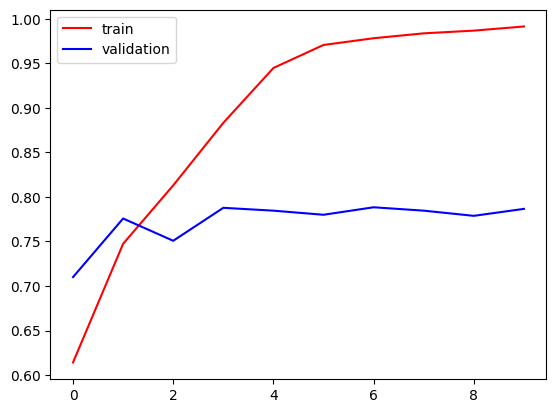

In [9]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [10]:
from keras.layers import BatchNormalization, Dropout

In [11]:
CNN1= Sequential()
CNN1.add(Conv2D (32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

CNN1.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

CNN1.add(Conv2D (128, kernel_size=(3,3), padding='valid', activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

CNN1.add(Flatten())
CNN1.add(Dense (128, activation='relu'))
CNN1.add(Dropout(0.1))
CNN1.add(Dense (64, activation='relu'))
CNN1.add(Dropout(0.1))
CNN1.add(Dense (1, activation='sigmoid'))

In [12]:
CNN1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
CNN1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history_CNN1 = CNN1.fit(train_d, epochs=13, validation_data=test_d)

Epoch 1/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5611 - loss: 2.5139 - val_accuracy: 0.6500 - val_loss: 0.6458
Epoch 2/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6906 - loss: 0.5902 - val_accuracy: 0.7038 - val_loss: 0.5562
Epoch 3/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7470 - loss: 0.5123 - val_accuracy: 0.7708 - val_loss: 0.4756
Epoch 4/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7880 - loss: 0.4534 - val_accuracy: 0.7806 - val_loss: 0.4624
Epoch 5/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8269 - loss: 0.3939 - val_accuracy: 0.7750 - val_loss: 0.4827
Epoch 6/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8499 - loss: 0.3409 - val_accuracy: 0.8174 - val_loss: 0.4544
Epoch 7/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8930 - loss: 0.2560 - val_accuracy: 0.8188 - val_loss: 0.4563
Epoch 8/13
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9266 - loss: 0.1832 - 

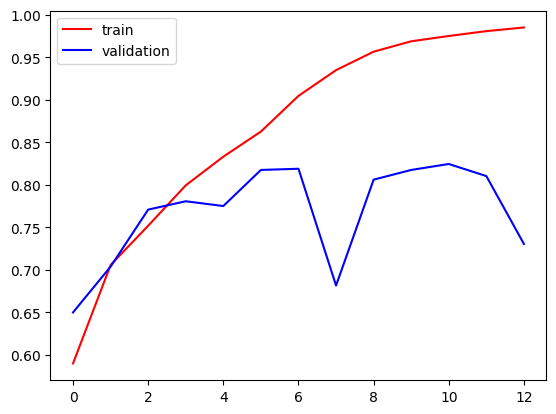

In [15]:
plt.plot(history_CNN1.history['accuracy'], color='red', label='train')
plt.plot(history_CNN1.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()